## Job recommendation pipeline will consist of the following steps:
    * Document is uploaded
    * Extract text data from document
    * Clean data with preprocessing
    * Vectorize text data
    * PCA to plot vectorized data
    * Calculate cosine similarities of document with job description database
    * Return list of job description matches with job titles and job categories
    
To Do:
    * Look into Deep Learning option
        https://slacker.ro/2019/04/29/deep-learning-with-keras-recommender-systems/

In [4]:
import networkx as nx

import numpy as np

# For reading files
import os

# Data manipulation
import pandas as pd

# Text cleaning
import re

import requests

## Text processing
# NLP
import spacy
from spacy.lang.en import English
from spacy.matcher import Matcher
from spacy.tokens import Span
nlp = spacy.load("en_core_web_sm")

# Sentence boundary detection
import pysbd

# More NLP for fun
from textblob import TextBlob

from tqdm import tqdm

# Pipeline creation
from sklearn.pipeline import Pipeline

# Text extraction - needed
from tika import parser

# Pull the data from the numberous cover letter files. 

import pandas as pd

import bs4

from collections import Counter

import matplotlib.pyplot as plt

import networkx as nx

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import numpy as np

# For reading files
import os

# Data manipulation
import pandas as pd

# Sentence boundary detection
import pysbd

from rake_nltk import Rake

import random

# Text cleaning
import re

import requests

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

## Text processing
# NLP
import spacy
from spacy.lang.en import English
from spacy.matcher import Matcher
from spacy.tokens import Span
nlp = spacy.load("en_core_web_sm")
from pysbd.utils import PySBDFactory


# More NLP for fun
from textblob import TextBlob

import texthero as hero

from tqdm import tqdm

# Pipeline creation
from sklearn.pipeline import Pipeline



In [65]:
import os

import pandas as pd

import re

from rake_nltk import Rake

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Text extraction
from tika import parser

In [2]:
document_data = pd.DataFrame(columns=['username', 'raw_cover_letters'])

all_text = []
filenames = []




def extract_data():
#     uploaded_file = request.FILES['document']
    uploaded_file  = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeBrittanyMouzoon.pdf")
    for filename in os.listdir(r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\Data_tobecompiled\Administrative_Assistant_New_York_NY_2020-06-23\CoverLetter"):
        parsed = parser.from_file(r'C:\Users\sambe\Projects\Cover_Letter_Analysis\data\Data_tobecompiled\Administrative_Assistant_New_York_NY_2020-06-23\CoverLetter\\' + filename)
        text = parsed['content']
        if parsed['content'] == None:
            print(filename + " is bad.")
        filenames.append(filename)
#         resumes_df.username = filenames
        try:
            text = text.replace('\n', '')          
        except:
            pass
        all_text.append(text)
#         print("extracting data from " + filename)
    more_cover_letter.raw_cover_letters = all_text
    more_cover_letter.username = filenames
#     resumes_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
    
extract_data()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-2-5da82c0ad8b0>, line 42)

In [53]:
document_data = pd.DataFrame(columns=['username', 'raw_text'])
all_text = []
filenames = []



uploaded_file  = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeBrittanyMouzoon.pdf")
parsed = parser.from_file(uploaded_file)
text = parsed['content']
if parsed['content'] == None:
    print("Unable to read " + uploaded_file)
try:
    text = text.replace('\n', '')
except:
    pass
all_text.append(text)
document_data.raw_text = all_text
document_data.username = 'Brittany Mouzoon'
# document_data.username = users.username

key_phrases = []
r = Rake(min_length=1, max_length=3)
r.extract_keywords_from_text(text)
phrases = r.get_word_degrees()
key_phrases.append(list(phrases.keys()))

document_data['key_phrases'] = key_phrases
document_data['bag_of_words'] = ''
for index, row in document_data.iterrows():
    words = ''
    words += ' '.join(row['key_phrases']) + ' '
    row['bag_of_words'] = words


In [55]:
document_data

,username,raw_text,key_phrases,bag_of_words
0,Brittany Mouzoon,"Indeed ResumeBrittany MouzoonLas Vegas, NV 891...","[326, employees, •, mydegree, kpis, merchandis...",326 employees • mydegree kpis merchandisingedu...


In [77]:
document = document_data[['username', 'bag_of_words']]

In [62]:
jobsdf = pd.read_csv('data/job_descriptions.csv')

In [63]:
jobsdf = jobsdf.dropna()

In [68]:
jobsdf.head()

,title,category,description,location
0,training_manager,management,The world's leading private security organizat...,NY
1,training_manager,management,The Training Manager is responsible for the de...,NY
2,training_manager,management,The Training Manager of Applied Data Analytics...,NY
3,training_manager,management,Unqork is the no-code platform that's pioneeri...,NY
4,training_manager,management,The Training Manager is in charge of training ...,NY


In [70]:
jobsdf['rake_key_words'] = ''
r = Rake()
for index, row in jobsdf.iterrows():
    r.extract_keywords_from_text(row['description'])
    key_words_dict_scores = r.get_word_degrees()
    row['rake_key_words'] = list(key_words_dict_scores.keys())

In [72]:
jobsdf['bag_of_words'] = ''
for index, row in jobsdf.iterrows():
    words = ''
    words += ' '.join(row['rake_key_words']) + ' '
    row['bag_of_words'] = words

In [73]:
jobsdf

,title,category,description,location,rake_key_words,bag_of_words
0,training_manager,management,The world's leading private security organizat...,NY,"[techniques, •, updates, ensure, security, pro...",techniques • updates ensure security procedure...
1,training_manager,management,The Training Manager is responsible for the de...,NY,"[provide, training, solutions, field, logistic...",provide training solutions field logistics bra...
2,training_manager,management,The Training Manager of Applied Data Analytics...,NY,"[collaboratively, experience, managing, stakeh...",collaboratively experience managing stakeholde...
3,training_manager,management,Unqork is the no-code platform that's pioneeri...,NY,"[learn, built, •, experience, presenting, form...",learn built • experience presenting former cio...
4,training_manager,management,The Training Manager is in charge of training ...,NY,"[training, needs, emphasis, employees, luxury,...",training needs emphasis employees luxury busin...
...,...,...,...,...,...,...
259,flight instructor,"sports, fitness, & recreation",Wallace State Community College- Hanceville ha...,"hanceville, AL","[--, flight, instructor, wallace, state, commu...",-- flight instructor wallace state community c...
260,dietitian (pool),"sports, fitness, & recreation",The Dietitian plans therapeutic diets and conf...,"phenix city, AL","[slippery, temperature, controlled, project, a...",slippery temperature controlled project assign...
261,youth services aide,"sports, fitness, & recreation",The Youth Services Aide is a permanent full-ti...,"montgomery, AL","[qualifications, located, placed, non, maintai...",qualifications located placed non maintained p...
262,nutritionist associate,"sports, fitness, & recreation","The Nutritionist Associate is a permanent, ful...","montgomery, AL","[state, permanent, positions, nutritionist, as...",state permanent positions nutritionist associa...


In [74]:
df = jobsdf[['title', 'bag_of_words']]

In [96]:
count = CountVectorizer()
count_matrix = count.fit_transform(df['bag_of_words'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim)

[[1.         0.22157509 0.17786577 ... 0.08399211 0.19034722 0.07406561]
 [0.22157509 1.         0.24679284 ... 0.01480385 0.15757982 0.09790709]
 [0.17786577 0.24679284 1.         ... 0.05006262 0.16044067 0.08583951]
 ...
 [0.08399211 0.01480385 0.05006262 ... 1.         0.10173968 0.08164966]
 [0.19034722 0.15757982 0.16044067 ... 0.10173968 1.         0.05607232]
 [0.07406561 0.09790709 0.08583951 ... 0.08164966 0.05607232 1.        ]]


In [97]:
indices = pd.Series(df['title'])

In [108]:
indices = pd.Series(df['title'])
def recommend_10(title, cosine_sim = cosine_sim):
    recommended_jobs = []
    idx = indices[indices == title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        recommended_jobs.append(list(df['title'])[i])
        
    return recommended_jobs

In [86]:
resume = document_data.rename(columns={"username": "title"})

In [87]:
resume.title = 'resume'

In [91]:
resumedf = resume[['title', 'bag_of_words']]

In [93]:
resumedf.head()

,title,bag_of_words
0,resume,326 employees • mydegree kpis merchandisingedu...


In [94]:
df = df.append(resumedf)

In [104]:
recommended_jobs = recommend_10('resume')

In [105]:
recommended_jobs

['account_manager',
 'training_manager',
 'hr_manager',
 'Manufacturing Supervisor',
 'Protective Services Manager',
 'Admissions Coordinator',
 'fraud specialist',
 'budget_analyst',
 'Proposal Manager',
 'Program Coordinator']

In [107]:
def recommend_100(title, cosine_sim = cosine_sim):
    recommended_jobs = []
    idx = indices[indices == title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:101].index)
    
    for i in top_10_indices:
        recommended_jobs.append(list(df['title'])[i])
        
    return recommended_jobs

In [109]:
jobs100 = recommend_100('resume')

In [132]:
jobs100.lower()

AttributeError: 'list' object has no attribute 'lower'

In [141]:
jobs100
jobs10 = []
for job in jobs100:
    job = job.lower().replace("_", " ").title()
    jobs10.append(job)

In [147]:
final_jobs10 = []
i = 0
for job in jobs10:
    if len(final_jobs10) < 10:
        if job[i] != job[i+1]:
            final_jobs10.append(job)
            i+=1

In [148]:
final_jobs10

['Account Manager',
 'Training Manager',
 'Hr Manager',
 'Manufacturing Supervisor',
 'Protective Services Manager',
 'Admissions Coordinator',
 'Fraud Specialist',
 'Budget Analyst',
 'Proposal Manager',
 'Budget Analyst']

In [149]:
#To select rows whose column value is in list 
user_titles = jobsdf[jobsdf.title.isin(jobs100)]

In [150]:
user_titles = user_titles[['title', 'category']]

In [151]:

user_titles.drop_duplicates(subset="title", keep="last")

,title,category
9,training_manager,management
19,hr_manager,management
29,cashier,"customer service, sales & retail"
39,account_manager,management
49,sales_rep,sales & retail
...,...,...
249,plant operator,manufacturing & warehouse
250,specialist - general assembly,manufacturing & warehouse
255,dietary aide,"sports, fitness, & recreation"
256,sr dietary aide,"sports, fitness, & recreation"


In [156]:
categories = list(user_titles.category)

In [177]:
frequency = []
def freq(category_list): 
    
    # gives set of unique words 
    unique_words = set(category_list) 
      
    for words in unique_words : 
        print('Frequency of ', words , 'is :', category_list.count(words)) 
        frequency.append(category_list.count(words))
        
    
    
  
# driver code 
if __name__ == "__main__": 
     
    # calling the freq function 
    freq(categories) 

Frequency of  customer service, sales & retail is : 10
Frequency of  art, fashion & design is : 10
Frequency of  accounting & finance is : 42
Frequency of  real estate is : 1
Frequency of  healthcare is : 2
Frequency of  management is : 43
Frequency of  sports, fitness, & recreation is : 2
Frequency of  science & engineering is : 2
Frequency of  customer service is : 5
Frequency of  sales & retail is : 18
Frequency of  education is : 1
Frequency of  protective services is : 3
Frequency of  admin & office is : 2
Frequency of  legal is : 7
Frequency of  social services & nonprofit is : 2
Frequency of  computer & it is : 5
Frequency of  transportation & logistics is : 1
Frequency of  manufacturing & warehouse is : 5


In [185]:
frequency

[10, 10, 42, 1, 2, 43, 2, 2, 5, 18, 1, 3, 2, 7, 2, 5, 1, 5]

In [182]:
unique_words = set(categories)

In [189]:
unique_words = list(unique_words)

In [193]:
category_values = dict(zip(unique_words, frequency))

In [194]:
category_values

{'customer service, sales & retail': 10,
 'art, fashion & design': 10,
 'accounting & finance': 42,
 'real estate': 1,
 'healthcare': 2,
 'management': 43,
 'sports, fitness, & recreation': 2,
 'science & engineering': 2,
 'customer service': 5,
 'sales & retail': 18,
 'education': 1,
 'protective services': 3,
 'admin & office': 2,
 'legal': 7,
 'social services & nonprofit': 2,
 'computer & it': 5,
 'transportation & logistics': 1,
 'manufacturing & warehouse': 5}

In [196]:
category_dict = {key:val for key, val in category_values.items() if val >= 10}

In [175]:
frequency

[10, 10, 42, 43, 18]

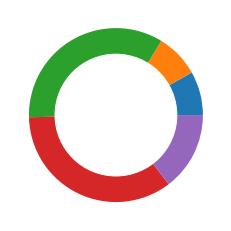

In [198]:
# library
import matplotlib.pyplot as plt
 
# create data
size_of_groups=category_dict.values()
 
# Create a pieplot
plt.pie(size_of_groups)
#plt.show()
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
 
plt.show()


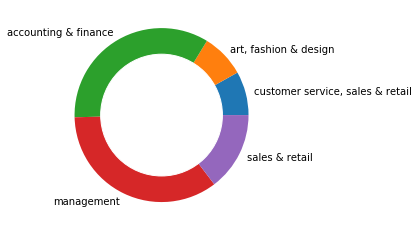

In [201]:
# create data
names=category_dict.keys()
size=category_dict.values()
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
